In [1]:
import torch
import torchvision.models as models
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:

base=time.time()
model=models.segmentation.deeplabv3_resnet101(pretrained=True)
model.eval()
print('{:.1f} model loaded'.format(time.time()-base))

7.8 model loaded


In [16]:



base=time.time()
from PIL import Image
from torchvision import transforms

input_image = Image.open('a.jpg')
#input_image = Image.open(r'.\CrackForest\Images\001.jpg')
input_image=input_image.resize((800,1080))

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
print('{:.1f} image processed'.format(time.time()-base))


0.2 image processed


In [17]:


base=time.time()
with torch.no_grad():
    output = model(input_batch)['out'][0]


print('{:.1f} model predicted'.format(time.time()-base))
# create a color pallette, selecting a color for each class


77.8 model predicted


In [18]:
output.shape

torch.Size([21, 2665, 1999])

In [19]:
output_predictions = output.argmax(0)

In [20]:
out=output_predictions.detach().cpu().numpy()
out.shape

(2665, 1999)

In [21]:
import numpy as np
np.unique(out)

array([ 0,  3,  5,  9, 15, 18, 20], dtype=int64)

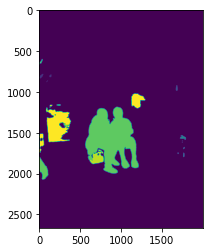

In [22]:
plt.imshow(output_predictions)

In [23]:
tmodel=torch.load('FloorExp\weights.pt')
tmodel.eval()

128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
      )
      (3): Bottleneck(
        (conv1): Conv2d(512, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(512, eps=1e-05, m

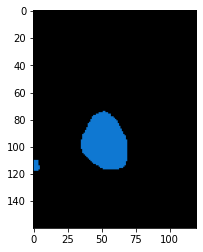

In [6]:
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)

plt.imshow(r)
